<a href="https://colab.research.google.com/github/jmmarinr/ComputationalMethods/blob/master/Librerias/Actividad02_Librerias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---



## 1.
Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$

$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$



Ingresa la velocidad de la moto (m/s):  15
Ingresa la aceleración del policía (m/s²):  3


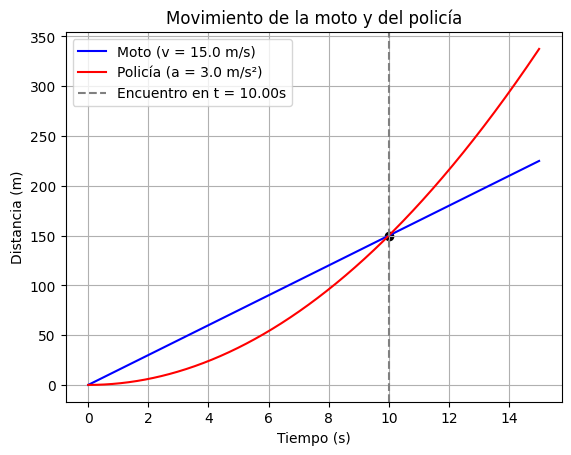


Tiempo en que se encuentran: 10.00 segundos


In [7]:
import matplotlib.pyplot as plt
import numpy as np
moto = float(input("Ingresa la velocidad de la moto (m/s): "))
policia = float(input("Ingresa la aceleración del policía (m/s²): "))

# Calcular tiempo de encuentro
tiempo_encuentro = (2 * moto) / policia
tiempos = np.linspace(0, tiempo_encuentro + 5, 1000)

# Posiciones para cada instante de tiempo
posicion_moto = moto * tiempos
posicion_policia = 0.5 * policia * tiempos**2

# Grafico los movimientos
plt.plot(tiempos, posicion_moto, label=f"Moto (v = {moto} m/s)", color='blue')
plt.plot(tiempos, posicion_policia, label=f"Policía (a = {policia} m/s²)", color='red')
plt.axvline(x=tiempo_encuentro, color='gray', linestyle='--', label=f'Encuentro en t = {tiempo_encuentro:.2f}s')
plt.scatter([tiempo_encuentro], [moto * tiempo_encuentro], color='black')
plt.title("Movimiento de la moto y del policía")
plt.xlabel("Tiempo (s)")
plt.ylabel("Distancia (m)")
plt.legend()
plt.grid(True)
plt.show()

# Mostrar el resultado por consola
print(f"\nTiempo en que se encuentran: {tiempo_encuentro:.2f} segundos")


---

##2.
El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $V(r)$ es el potencial en función de la distancia interatómica $r$.
- $\epsilon$ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $\sigma$ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $r$ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{1/6}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{1/6}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.




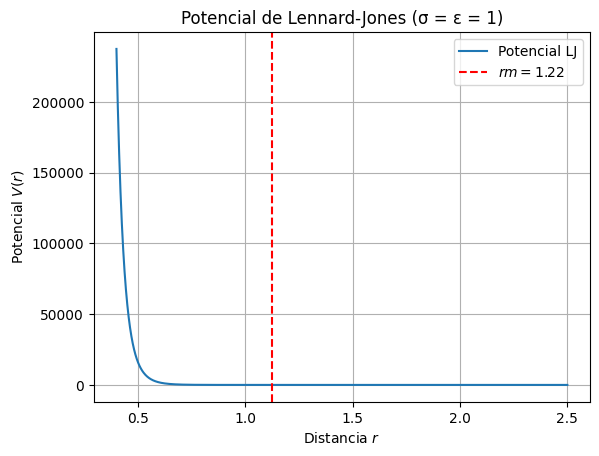

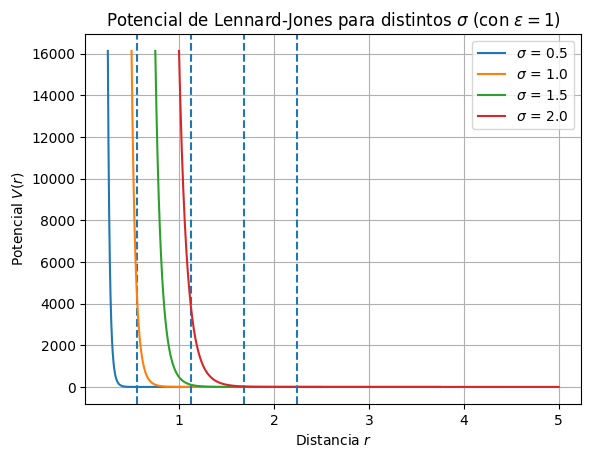

In [28]:
import numpy as np
import matplotlib.pyplot as plt
def potencial_lj(e,o,r):
    return 4*e*((o/r)**12 - (o/r)**6)
e=1
o=1
rc=2.5*o
lista_r= np.linspace(0.4,rc,1000)
V= potencial_lj(e,o,lista_r)
rm=2**(1/6) * o
plt.plot(lista_r, V, label="Potencial LJ")
plt.axvline(rm, color='red', linestyle='--', label=f"$rm = 1.22$")
plt.xlabel("Distancia $r$")
plt.ylabel("Potencial $V(r)$")
plt.title("Potencial de Lennard-Jones (σ = ε = 1)")
plt.legend()
plt.grid(True)
plt.show()

epsilon = 1
sigmas = [0.5, 1.0, 1.5, 2.0]

for i, sigma in enumerate(sigmas):
    rc = 2.5 * sigma
    r = np.linspace(0.5 * sigma, rc, 1000)
    V = potencial_lj(epsilon, sigma, r)
    rm = 2**(1/6) * sigma
    plt.plot(r, V, label=f"$\sigma$ = {sigma}")
    plt.axvline(rm, linestyle="--")
plt.xlabel("Distancia $r$")
plt.ylabel("Potencial $V(r)$")
plt.title("Potencial de Lennard-Jones para distintos $\sigma$ (con $\epsilon = 1$)")
plt.grid(True)
plt.legend()
plt.show()

##3.  
El siguiente código exporta tablas html de sitios web

```python
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````

El primer dataset muestra las alturas medias de niñ@s de 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres de las columnas al español.

b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños (cm) y niñas (cm) en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.


In [38]:
#intenté e intenté pero el modulo me daba error